# Intro:
 
Cryptocurrency represents a relatively new and distinct form of currency that shares some similarities with both fiat money and commodity money, yet also possesses unique characteristics due to its digital and decentralized nature. Let's explore how cryptocurrency compares to these traditional forms of money:

## Similarities to Commodity Money:

Limited Supply: Like commodity money, many cryptocurrencies have a predefined maximum supply. For example, Bitcoin has a fixed supply of 21 million coins, which is meant to mimic the scarcity aspect of commodities.

Decentralization: Cryptocurrencies often operate on decentralized networks, which means they are not controlled by a single entity (like a central bank). This is reminiscent of the decentralized nature of commodity money.

## Differences from Commodity Money:

Intrinsic Value: Unlike commodity money, cryptocurrencies do not have intrinsic value. Their value is largely driven by market demand, supply dynamics, and speculative trading. They lack a physical backing or direct linkage to a tangible commodity.

Digital Nature: Cryptocurrencies are purely digital assets that exist in the form of code on distributed ledgers (blockchains). They lack the physical presence associated with commodity money.

## Similarities to Fiat Money:

Trust-Based Value: Similar to fiat money, the value of cryptocurrencies is largely based on trust and belief in their utility, security, and potential for adoption.

Acceptance as Medium of Exchange: Cryptocurrencies are accepted as a medium of exchange in various transactions and can be used for online purchases, investment, remittances, and more, akin to how fiat money is used.

Government Independence: Just as fiat money can exist independently of a commodity backing, cryptocurrencies operate independently of governmental control. They are not issued or regulated by any central authority.

## Differences from Fiat Money:

Decentralization: While both cryptocurrencies and fiat money can be decentralized in their operation (e.g., through distributed ledger technology), most fiat money is still ultimately managed by central banks or governments, whereas cryptocurrencies operate on decentralized networks.

Volatility: Cryptocurrencies tend to exhibit much higher price volatility compared to most fiat currencies. This volatility can be a result of speculative trading, market sentiment, and relatively small market sizes.

In essence, cryptocurrencies combine certain aspects of both commodity money and fiat money while introducing their own unique features. They are digital assets that rely on decentralized technology and market demand for their value. The lack of intrinsic value and the presence of extreme price volatility distinguish cryptocurrencies from traditional forms of money. Their role in the global economy and financial landscape continues to evolve as they gain wider acceptance and use cases.

# `EDA` (Exploratory Data Analysis)

Debes realizar un análisis exploratorio de los datos en un notebook. Tienen que estar tus pasos documentados con claridad, con las conclusiones correspondientes en cada gráfico empleado y análisis de lo que vas observando, utilizando celdas Markdown para tal fin. La prolijidad del notebook será un aspecto a evaluar. Es importante que tengas en cuenta que, en muchas oportunidades y trabajos, un EDA constituye un entregable en sí mismo.

En esta línea, hay varios aspectos indispensables que **deben** ser abordados en cualquier Análisis Exploratorio de Datos y tomaremos como punto de partida para evaluar tu performance en este apartado. Entre estos aspectos destacados se encuentran: 

### *búsqueda de valores faltantes, valores atípicos/extremos u outliers y registros duplicados*. 

Asimismo, la utilización de gráficos coherentes según la tipología de variable que corresponda resulta esencial.

***En caso de hacer uso de librerías como pandas_profiling, es indispensable acompañar los gráficos con análisis propios.***

## 📚 Libreries:

In [52]:
import requests
import pandas as pd
import seaborn as sns
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time  # Import the time module
import numpy as np

## 🔌 [API CoinGecko](https://www.coingecko.com/es/api/documentation): conection 

### 🌎📰 Trending top 7:
Top-7 trending coins on CoinGecko as searched by users in the last 24 hours (Ordered by most popular first).

In [2]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/search/trending"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_trends = response.json()
        coins_data_global_trends = global_trends.get('coins', [])  # Extract coins data
        
        coins_global_trends = pd.DataFrame([item['item'] for item in coins_data_global_trends])  # Create DataFrame for coins
        
        return coins_global_trends
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    coins_global_trends = get_coin_list()
    if coins_global_trends is not None:
        print("Coins DataFrame:")
        print(coins_global_trends)



Coins DataFrame:
               id  coin_id            name symbol  market_cap_rank  \
0     sei-network    28205             Sei    SEI              122   
1   akash-network    12785   Akash Network    AKT              108   
2          solana     4128          Solana    SOL               10   
3  bone-shibaswap    16916  Bone ShibaSwap   BONE              109   
4         bitrock    30987         Bitrock  BROCK              882   
5           tezos      976           Tezos    XTZ               58   
6             sui    26375             Sui    SUI               90   
7   worldcoin-wld    31069       Worldcoin    WLD              169   

                                               thumb  \
0  https://assets.coingecko.com/coins/images/2820...   
1  https://assets.coingecko.com/coins/images/1278...   
2  https://assets.coingecko.com/coins/images/4128...   
3  https://assets.coingecko.com/coins/images/1691...   
4  https://assets.coingecko.com/coins/images/3098...   
5  https://asset

In [3]:
coins_global_trends = coins_global_trends.applymap(lambda x: x.lower() if isinstance(x, str) else x)

print(coins_global_trends)

               id  coin_id            name symbol  market_cap_rank  \
0     sei-network    28205             sei    sei              122   
1   akash-network    12785   akash network    akt              108   
2          solana     4128          solana    sol               10   
3  bone-shibaswap    16916  bone shibaswap   bone              109   
4         bitrock    30987         bitrock  brock              882   
5           tezos      976           tezos    xtz               58   
6             sui    26375             sui    sui               90   
7   worldcoin-wld    31069       worldcoin    wld              169   

                                               thumb  \
0  https://assets.coingecko.com/coins/images/2820...   
1  https://assets.coingecko.com/coins/images/1278...   
2  https://assets.coingecko.com/coins/images/4128...   
3  https://assets.coingecko.com/coins/images/1691...   
4  https://assets.coingecko.com/coins/images/3098...   
5  https://assets.coingecko.com/c

In [4]:
coins_global_trends.head(10)

,id,coin_id,name,symbol,market_cap_rank,thumb,small,large,slug,price_btc,score
0,sei-network,28205,sei,sei,122,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,sei,0.000006,0
1,akash-network,12785,akash network,akt,108,https://assets.coingecko.com/coins/images/1278...,https://assets.coingecko.com/coins/images/1278...,https://assets.coingecko.com/coins/images/1278...,akash-network,0.000056,1
2,solana,4128,solana,sol,10,https://assets.coingecko.com/coins/images/4128...,https://assets.coingecko.com/coins/images/4128...,https://assets.coingecko.com/coins/images/4128...,solana,0.000805,2
3,bone-shibaswap,16916,bone shibaswap,bone,109,https://assets.coingecko.com/coins/images/1691...,https://assets.coingecko.com/coins/images/1691...,https://assets.coingecko.com/coins/images/1691...,bone-shibaswap,0.000053,3
4,bitrock,30987,bitrock,brock,882,https://assets.coingecko.com/coins/images/3098...,https://assets.coingecko.com/coins/images/3098...,https://assets.coingecko.com/coins/images/3098...,bitrock,0.000004,4
5,tezos,976,tezos,xtz,58,https://assets.coingecko.com/coins/images/976/...,https://assets.coingecko.com/coins/images/976/...,https://assets.coingecko.com/coins/images/976/...,tezos,0.000027,5
6,sui,26375,sui,sui,90,https://assets.coingecko.com/coins/images/2637...,https://assets.coingecko.com/coins/images/2637...,https://assets.coingecko.com/coins/images/2637...,sui,0.000022,6
7,worldcoin-wld,31069,worldcoin,wld,169,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,worldcoin,0.000054,7


In [5]:
list_rank = coins_global_trends['symbol'].tolist()

In [6]:
coins_global_trends.rename(columns={'id': 'crip_id'}, inplace=True)

#### Guardo csv: coins_global_trends.csv

In [7]:
coins_global_trends.to_csv('../Csvs_cleanned/coins_global_trends.csv', index=False, mode='w',header=True)

In [8]:
list_rank

['sei', 'akt', 'sol', 'bone', 'brock', 'xtz', 'sui', 'wld']

_____________________________________________________________

### 🌎📊  Global data:
Get global data - total_volume, total_market_cap, ongoing icos etc

#### Conection:

In [9]:

def get_coin_list():
    url = "https://api.coingecko.com/api/v3/global"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_data = response.json()
        list_of_global_data = pd.DataFrame(global_data)
        return list_of_global_data
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_global_data = get_coin_list()
    if list_of_global_data is not None:
        print(list_of_global_data)

                                                                                   data
active_cryptocurrencies                                                           10187
ended_icos                                                                         3376
market_cap_change_percentage_24h_usd                                          -1.052031
market_cap_percentage                 {'btc': 46.40720248114988, 'eth': 18.152694173...
markets                                                                             837
ongoing_icos                                                                         49
total_market_cap                      {'btc': 41947684.23559541, 'eth': 663208317.33...
total_volume                          {'btc': 1770906.9878512437, 'eth': 27998690.86...
upcoming_icos                                                                         0
updated_at                                                                   1692896485


#### Market_cap_percentage: %

In [10]:
# Extraer el contenido del diccionario en la columna "market_cap_percentage"
market_cap_percentage_dict = list_of_global_data.at['market_cap_percentage', 'data']

# Crear un DataFrame a partir del diccionario
market_cap_percentage_df = pd.DataFrame(market_cap_percentage_dict.items(), columns=['crip_id', 'market_cap_percentage'])

# Imprimir el nuevo DataFrame
print(market_cap_percentage_df)


  crip_id  market_cap_percentage
0     btc              46.407202
1     eth              18.152694
2    usdt               7.565269
3     bnb               3.063912
4     xrp               2.499910
5    usdc               2.366057
6   steth               1.261758
7     ada               0.847996
8    doge               0.808247
9     sol               0.787639


#### Market_cap: $

In [11]:
total_market_cap_dict = list_of_global_data.at['total_market_cap', 'data']

# Crear un DataFrame a partir del diccionario
total_market_cap_df = pd.DataFrame(total_market_cap_dict.items(), columns=['crip_id', 'total_market_cap'])

# Imprimir el nuevo DataFrame
print(total_market_cap_df)

   crip_id  total_market_cap
0      btc      4.194768e+07
1      eth      6.632083e+08
2      ltc      1.688383e+10
3      bch      5.730645e+09
4      bnb      5.023442e+09
..     ...               ...
56     xdr      8.233457e+11
57     xag      4.533038e+10
58     xau      5.708246e+08
59    bits      4.194768e+13
60    sats      4.194768e+15

[61 rows x 2 columns]


#### Total_volume: $

In [12]:
# Extraer el contenido del diccionario en la columna "market_cap_percentage"
total_volume_dict = list_of_global_data.at['total_volume', 'data']

# Crear un DataFrame a partir del diccionario
total_volume_df = pd.DataFrame(total_volume_dict.items(), columns=['crip_id', 'total_volume'])

# Imprimir el nuevo DataFrame
print(total_volume_df)

   crip_id  total_volume
0      btc  1.770907e+06
1      eth  2.799869e+07
2      ltc  7.127852e+08
3      bch  2.419309e+08
4      bnb  2.120748e+08
..     ...           ...
56     xdr  3.475922e+10
57     xag  1.913714e+09
58     xau  2.409852e+07
59    bits  1.770907e+12
60    sats  1.770907e+14

[61 rows x 2 columns]


#### Merged:

In [13]:
merged_df = market_cap_percentage_df.merge(total_market_cap_df, on='crip_id').merge(total_volume_df, on='crip_id')
merged_df = merged_df.sort_values(by=['market_cap_percentage', 'total_volume'], ascending=[False, False])

print(merged_df)


  crip_id  market_cap_percentage  total_market_cap  total_volume
0     btc              46.407202      4.194768e+07  1.770907e+06
1     eth              18.152694      6.632083e+08  2.799869e+07
2     bnb               3.063912      5.023442e+09  2.120748e+08
3     xrp               2.499910      2.117374e+12  8.938925e+10


#### Guardo csv: tops_criptos.csv

In [14]:
merged_df.to_csv('../Csvs_cleanned/top_criptos.csv', index=False, mode='w',header=True)

#### Combinacion, listado de codigos en los listados recientemente importados:

In [15]:
lista_coins0 = merged_df['crip_id'].tolist()
lista_coins1 = market_cap_percentage_df['crip_id'].tolist()
lista_coins2 = total_market_cap_df['crip_id'].tolist()
lista_coins3 = total_volume_df['crip_id'].tolist()

In [16]:
complete_list = lista_coins0 + lista_coins1 + list_rank #+ lista_coins2 + lista_coins3
complete_list = list(set(complete_list)) #quitar duplicados

##### Listado completo de ids a buscar como los mas recomendados en base a marketcap y total volume de cada cripto. HOY, YA!, AHORA!.

In [17]:
len(complete_list)

17

In [18]:
complete_list_lower = [item.lower() if isinstance(item, str) else item for item in complete_list]


In [19]:
complete_list_lower

['bone',
 'steth',
 'brock',
 'sei',
 'eth',
 'ada',
 'akt',
 'xtz',
 'wld',
 'usdc',
 'doge',
 'sol',
 'sui',
 'bnb',
 'btc',
 'xrp',
 'usdt']

### 🪙📚 Listado de monedas: 

#### Importando listado de ids criptos API coingecko: Obteniendo el listado de ids anteriormente destacados, o al menos todos los que se encuentren disponibles en API

In [20]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/coins/list?include_platform=false"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_list = response.json()
        coin_id = pd.DataFrame(coin_list)
        return coin_id
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    coin_id = get_coin_list()
    if coin_id is not None:
        print(coin_id)


                             id symbol                       name
0                        01coin    zoc                     01coin
1                        0chain    zcn                        Zus
2                 0vix-protocol    vix              0VIX Protocol
3                            0x    zrx                0x Protocol
4      0x0-ai-ai-smart-contract    0x0  0x0.ai: AI Smart Contract
...                         ...    ...                        ...
10182                 zyberswap    zyb                  Zyberswap
10183                  zynecoin    zyn                   Zynecoin
10184                   zynergy    zyn                    Zynergy
10185                       zyx    zyx                        ZYX
10186                       zzz    zzz                GoSleep ZZZ

[10187 rows x 3 columns]


In [21]:
coin_id.head(15)

,id,symbol,name
0,01coin,zoc,01coin
1,0chain,zcn,Zus
2,0vix-protocol,vix,0VIX Protocol
3,0x,zrx,0x Protocol
4,0x0-ai-ai-smart-contract,0x0,0x0.ai: AI Smart Contract
5,0x1-tools-ai-multi-tool,0x1,0x1.tools: AI Multi-tool
6,0xauto-io-contract-auto-deployer,0xa,0xAuto.io : Contract Auto Deployer
7,0xcoco,coco,0xCoco
8,0xdao,oxd,0xDAO
9,0xdao-v2,oxd v2,0xDAO V2


In [22]:
coin_id.shape

(10187, 3)

In [23]:
coin_id = coin_id.drop_duplicates()

#### Filtrado De las mas relevantes:

In [24]:
coin_id = coin_id[
    coin_id['symbol'].isin(complete_list) |
    coin_id['id'].isin(complete_list) |
    coin_id['name'].isin(complete_list)
]


In [25]:
coin_id.head(20)

,id,symbol,name
300,akash-network,akt,Akash Network
1108,binancecoin,bnb,BNB
1109,binance-coin-wormhole,bnb,Binance Coin (Wormhole)
1115,binance-peg-cardano,ada,Binance-Peg Cardano
1116,binance-peg-dogecoin,doge,Binance-Peg Dogecoin
1124,binance-peg-xrp,xrp,Binance-Peg XRP
1163,bitcoin,btc,Bitcoin
1231,bitrock,brock,Bitrock
1405,bone-2,bone,Bone
1407,bone-shibaswap,bone,Bone ShibaSwap


In [26]:
coin_id.shape

(43, 3)

In [27]:
coin_id.rename(columns={'id': 'crip_id'}, inplace=True)

In [28]:
coin_id.isnull().sum()

crip_id    0
symbol     0
name       0
dtype: int64

In [29]:
coin_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 300 to 9780
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   crip_id  43 non-null     object
 1   symbol   43 non-null     object
 2   name     43 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [30]:
coin_id['crip_id'] = coin_id['crip_id'].str.lower()
coin_id['symbol'] = coin_id['symbol'].str.lower()
coin_id['name'] = coin_id['name'].str.lower()

In [31]:

coin_id = coin_id.applymap(lambda x: x.lower() if isinstance(x, str) else x)

print(coin_id)

                                crip_id symbol  \
300                       akash-network    akt   
1108                        binancecoin    bnb   
1109              binance-coin-wormhole    bnb   
1115                binance-peg-cardano    ada   
1116               binance-peg-dogecoin   doge   
1124                    binance-peg-xrp    xrp   
1163                            bitcoin    btc   
1231                            bitrock  brock   
1405                             bone-2   bone   
1407                     bone-shibaswap   bone   
1408                           boneswap   bone   
1409                         bone-token   bone   
1471               bridged-tether-linea   usdt   
1472            bridged-tether-stargate   usdt   
1476             bridged-usd-coin-linea   usdc   
1636                            cardano    ada   
2695                           dogecoin   doge   
2720                 doge-on-pulsechain   doge   
3119                           ethereum    eth   


In [32]:
coin_id = coin_id.reset_index(drop=True)

In [33]:
coin_id.head(10)

,crip_id,symbol,name
0,akash-network,akt,akash network
1,binancecoin,bnb,bnb
2,binance-coin-wormhole,bnb,binance coin (wormhole)
3,binance-peg-cardano,ada,binance-peg cardano
4,binance-peg-dogecoin,doge,binance-peg dogecoin
5,binance-peg-xrp,xrp,binance-peg xrp
6,bitcoin,btc,bitcoin
7,bitrock,brock,bitrock
8,bone-2,bone,bone
9,bone-shibaswap,bone,bone shibaswap


In [34]:
coin_id.shape

(43, 3)

##### Guardo csv contenedor de info crip_ip:

In [35]:
coin_id.to_csv('../Csvs_cleanned/coin_id.csv', index=False, mode='w',header=True)

In [36]:
lista_coins1 = coin_id['crip_id'].tolist()
lista_coins2 = coin_id['symbol'].tolist()
lista_coins3 = coin_id['name'].tolist()


In [37]:
lista_coins =  lista_coins1 + lista_coins2 + lista_coins3

In [38]:
lista_coins = list(set(lista_coins))

#### Guardo lista de las mas importantes. para ser luego utilizadas por los demas codigos.

In [39]:
len(lista_coins)

84

In [40]:
lista_coins

['bone',
 'warioxrpdumbledoreyugioh69inu',
 'akash-network',
 'sei-network',
 'sei',
 'bone shibaswap',
 'worldcoin',
 'usd coin',
 'heco-peg binance coin',
 'brock',
 'steth',
 'eth',
 'xtz',
 'cardano',
 'bridged tether (linea)',
 'tether-pulsechain',
 'usd-coin-avalanche-bridged-usdc-e',
 'bridged usd coin (linea)',
 'bridged-tether-linea',
 'doge on pulsechain',
 'sol (wormhole)',
 'polypup bone',
 'sui',
 'btc',
 'akt',
 'doge-on-pulsechain',
 'usd-coin',
 'worldcoin-wld',
 'sui-iou',
 'wrapped-solana',
 'bridged usd coin (force bridge)',
 'bridged usd coin (avalanche)',
 'sol-wormhole',
 'heco-peg-xrp',
 'binance-peg-cardano',
 'wlitidao',
 'heco-peg-bnb',
 'binance-peg cardano',
 'bitcoin',
 'ada',
 'solana',
 'akash network',
 'binance-peg xrp',
 'tezos',
 'bridged usd coin (pulsechain)',
 'usdc',
 'bnb',
 'bone-2',
 'heco-peg xrp',
 'ripple',
 'force-bridge-usdc',
 'doge',
 'ethereum',
 'bridged-tether-stargate',
 'ethereum-wormhole',
 'bridged tether (stargate)',
 'wrapped so

#### Producto: lista_coins

##### Agregado de alguunas que si o si queremos que esten

In [41]:
# Agregar dos elementos adicionales a la lista . elementos que si o si quiero que figuren,
lista_coins.append("ethereum")
lista_coins.append("bitcoin")

# Imprimir la lista actualizada
print(lista_coins)


['bone', 'warioxrpdumbledoreyugioh69inu', 'akash-network', 'sei-network', 'sei', 'bone shibaswap', 'worldcoin', 'usd coin', 'heco-peg binance coin', 'brock', 'steth', 'eth', 'xtz', 'cardano', 'bridged tether (linea)', 'tether-pulsechain', 'usd-coin-avalanche-bridged-usdc-e', 'bridged usd coin (linea)', 'bridged-tether-linea', 'doge on pulsechain', 'sol (wormhole)', 'polypup bone', 'sui', 'btc', 'akt', 'doge-on-pulsechain', 'usd-coin', 'worldcoin-wld', 'sui-iou', 'wrapped-solana', 'bridged usd coin (force bridge)', 'bridged usd coin (avalanche)', 'sol-wormhole', 'heco-peg-xrp', 'binance-peg-cardano', 'wlitidao', 'heco-peg-bnb', 'binance-peg cardano', 'bitcoin', 'ada', 'solana', 'akash network', 'binance-peg xrp', 'tezos', 'bridged usd coin (pulsechain)', 'usdc', 'bnb', 'bone-2', 'heco-peg xrp', 'ripple', 'force-bridge-usdc', 'doge', 'ethereum', 'bridged-tether-stargate', 'ethereum-wormhole', 'bridged tether (stargate)', 'wrapped solana', 'tether', 'binance coin (wormhole)', 'boneswap', 

##### Cantidad de coins a obtener informacion:

In [42]:
print(len(lista_coins))

86


###  Listado ids coingecko + info general, ranking .. posee info MUY IMPORTANTE https://api.coingecko.com/api/v3/coins/bitcoin?tickers=false&market_data=false&community_data=false&developer_data=false&sparkline=false

tarda aprox 9 minutos, api limitation for lot of request , have to wait at #429

In [43]:
list_of_coins_id_resume = pd.DataFrame()

def get_coin_id_list(crip_id):
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}?tickers=false&market_data=false&community_data=false&developer_data=false&sparkline=false"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_data = response.json()
        coin_id = pd.DataFrame({"crip_id": [crip_id]})
        
        for key, value in coin_data.items():
            if isinstance(value, (int, float, str)):
                coin_id[key] = [value]
        
        return coin_id
    else:
        print(f"Error en la solicitud: Listado de monedas {crip_id}", response.status_code)
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_id_list(crip_id)

if __name__ == "__main__":
    
    for crip_id in lista_coins:
        coin_id = get_coin_id_list(crip_id)
        if coin_id is not None:
            list_of_coins_id_resume = pd.concat([list_of_coins_id_resume, coin_id], ignore_index=True)



Error en la solicitud: Listado de monedas bone 404


Error en la solicitud: Listado de monedas sei 404
Error en la solicitud: Listado de monedas bone shibaswap 404
Error en la solicitud: Listado de monedas usd coin 404
Error en la solicitud: Listado de monedas heco-peg binance coin 404
Error en la solicitud: Listado de monedas brock 404
Error en la solicitud: Listado de monedas steth 404
Error en la solicitud: Listado de monedas eth 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud: Listado de monedas eth 404
Error en la solicitud: Listado de monedas xtz 404
Error en la solicitud: Listado de monedas bridged tether (linea) 404
Error en la solicitud: Listado de monedas bridged usd coin (linea) 404
Error en la solicitud: Listado de monedas doge on pulsechain 404
Error en la solicitud: Listado de monedas sol (wormhole) 404
Error en la solicitud: Listado de monedas polypup bone 404
Error en la solicitud: Listado de monedas btc 429
have to wait 60 seconds, plea

In [44]:
list_of_coins_id_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   crip_id                          46 non-null     object 
 1   id                               46 non-null     object 
 2   symbol                           46 non-null     object 
 3   name                             46 non-null     object 
 4   asset_platform_id                31 non-null     object 
 5   block_time_in_minutes            46 non-null     int64  
 6   country_origin                   46 non-null     object 
 7   contract_address                 31 non-null     object 
 8   watchlist_portfolio_users        46 non-null     int64  
 9   coingecko_score                  46 non-null     float64
 10  developer_score                  46 non-null     float64
 11  community_score                  46 non-null     float64
 12  liquidity_score         

In [45]:
list_of_coins_id_resume.head(20)

,crip_id,id,symbol,name,asset_platform_id,block_time_in_minutes,country_origin,contract_address,watchlist_portfolio_users,coingecko_score,...,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,coingecko_rank,hashing_algorithm,genesis_date,public_notice
0,warioxrpdumbledoreyugioh69inu,warioxrpdumbledoreyugioh69inu,xrp,WarioXRPDumbledoreYugioh69Inu,ethereum,0,,0xb1c064c3f2908f741c9dea4afc5773238b53e6cc,51,0.000,...,0.000,0.000,2023-08-22T09:00:24.142Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,akash-network,akash-network,akt,Akash Network,NaN,0,US,NaN,51086,43.599,...,25.050,0.002,2023-08-24T17:09:27.252Z,85.92,14.08,108.0,121.0,NaN,NaN,NaN
2,sei-network,sei-network,sei,Sei,NaN,0,,NaN,9051,0.000,...,0.000,0.000,2023-08-24T17:09:31.034Z,71.59,28.41,122.0,NaN,NaN,NaN,NaN
3,worldcoin,worldcoin,wdc,WorldCoin,NaN,0,,NaN,3568,11.995,...,1.000,0.000,2023-08-24T17:08:53.557Z,NaN,NaN,3643.0,2684.0,Scrypt,2013-05-14,NaN
4,cardano,cardano,ada,Cardano,NaN,0,,NaN,724918,62.536,...,72.124,0.023,2023-08-24T17:10:38.035Z,85.57,14.43,8.0,7.0,NaN,NaN,NaN
5,tether-pulsechain,tether-pulsechain,usdt,Bridged Tether (PulseChain),pulsechain,0,,0x0cb6f5a34ad42ec934882a05265a7d5f59b51a2f,197,0.000,...,0.000,0.000,2023-08-24T17:10:36.147Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,usd-coin-avalanche-bridged-usdc-e,usd-coin-avalanche-bridged-usdc-e,usdc,Bridged USD Coin (Avalanche),avalanche,0,,0xa7d7079b0fead91f3e65f86e8915cb59c1a4c664,477,7.981,...,39.897,0.033,2023-08-24T17:10:33.260Z,NaN,NaN,NaN,3451.0,NaN,NaN,NaN
7,bridged-tether-linea,bridged-tether-linea,usdt,Bridged Tether (Linea),linea,0,,0xa219439258ca9da29e9cc4ce5596924745e12b93,24,0.000,...,0.000,0.000,2023-08-24T17:10:40.861Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,sui,sui,sui,Sui,NaN,0,,NaN,34813,2.085,...,0.000,0.014,2023-08-24T17:10:40.187Z,77.14,22.86,90.0,5416.0,NaN,NaN,NaN
9,doge-on-pulsechain,doge-on-pulsechain,doge,Doge on Pulsechain,pulsechain,0,,0x9cc7437978255e2c38b0d3d4671fb9ac411a68ac,102,0.000,...,0.000,0.000,2023-08-24T17:10:46.460Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
columns_to_drop = ['id', 'symbol', 'name', 'country_origin', 'contract_address','hashing_algorithm','genesis_date']
list_of_coins_id_resume.drop(columns=columns_to_drop, inplace=True)

In [47]:
list_of_coins_id_resume['last_updated'] = pd.to_datetime(list_of_coins_id_resume['last_updated'])


In [48]:
list_of_coins_id_resume = list_of_coins_id_resume.applymap(lambda x: x.lower() if isinstance(x, str) else x)

print(list_of_coins_id_resume.head())

                         crip_id asset_platform_id  block_time_in_minutes  \
0  warioxrpdumbledoreyugioh69inu          ethereum                      0   
1                  akash-network               NaN                      0   
2                    sei-network               NaN                      0   
3                      worldcoin               NaN                      0   
4                        cardano               NaN                      0   

   watchlist_portfolio_users  coingecko_score  developer_score  \
0                         51            0.000            0.000   
1                      51086           43.599           70.553   
2                       9051            0.000            0.000   
3                       3568           11.995           26.498   
4                     724918           62.536           70.270   

   community_score  liquidity_score  public_interest_score  \
0            0.000            0.000                  0.000   
1           34.8

In [49]:
list_of_coins_id_resume.head()

,crip_id,asset_platform_id,block_time_in_minutes,watchlist_portfolio_users,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,coingecko_rank,public_notice
0,warioxrpdumbledoreyugioh69inu,ethereum,0,51,0.000,0.000,0.000,0.000,0.000,2023-08-22 09:00:24.142000+00:00,NaN,NaN,NaN,NaN,NaN
1,akash-network,NaN,0,51086,43.599,70.553,34.801,25.050,0.002,2023-08-24 17:09:27.252000+00:00,85.92,14.08,108.0,121.0,NaN
2,sei-network,NaN,0,9051,0.000,0.000,0.000,0.000,0.000,2023-08-24 17:09:31.034000+00:00,71.59,28.41,122.0,NaN,NaN
3,worldcoin,NaN,0,3568,11.995,26.498,7.231,1.000,0.000,2023-08-24 17:08:53.557000+00:00,NaN,NaN,3643.0,2684.0,NaN
4,cardano,NaN,0,724918,62.536,70.270,58.753,72.124,0.023,2023-08-24 17:10:38.035000+00:00,85.57,14.43,8.0,7.0,NaN


In [50]:
list_of_coins_id_resume.shape

(46, 15)

In [53]:
for column in list_of_coins_id_resume.columns:
    if list_of_coins_id_resume[column].dtype == np.float64 or list_of_coins_id_resume[column].dtype == np.int64:
        list_of_coins_id_resume[column] = list_of_coins_id_resume[column].fillna(0)


In [54]:
list_of_coins_id_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   crip_id                          46 non-null     object             
 1   asset_platform_id                31 non-null     object             
 2   block_time_in_minutes            46 non-null     int64              
 3   watchlist_portfolio_users        46 non-null     int64              
 4   coingecko_score                  46 non-null     float64            
 5   developer_score                  46 non-null     float64            
 6   community_score                  46 non-null     float64            
 7   liquidity_score                  46 non-null     float64            
 8   public_interest_score            46 non-null     float64            
 9   last_updated                     46 non-null     datetime64[ns, UTC]
 10  sent

##### Guardo csv ranking_coingecko:

In [55]:
list_of_coins_id_resume.to_csv('../Csvs_cleanned/ranking_coingecko.csv', index=False , mode= 'w',header=True)

In [56]:
# Obtener valores únicos de la columna 'crip_id'
lista_coins = list_of_coins_id_resume['crip_id'].unique().tolist()

# Agregar dos elementos adicionales a la lista . elementos que si o si quiero que figuren,
lista_coins.append("ethereum")
lista_coins.append("bitcoin")

# Imprimir la lista actualizada
print(lista_coins)


['warioxrpdumbledoreyugioh69inu', 'akash-network', 'sei-network', 'worldcoin', 'cardano', 'tether-pulsechain', 'usd-coin-avalanche-bridged-usdc-e', 'bridged-tether-linea', 'sui', 'doge-on-pulsechain', 'usd-coin', 'worldcoin-wld', 'sui-iou', 'wrapped-solana', 'sol-wormhole', 'heco-peg-xrp', 'binance-peg-cardano', 'wlitidao', 'heco-peg-bnb', 'bitcoin', 'solana', 'tezos', 'bone-2', 'ripple', 'force-bridge-usdc', 'ethereum', 'bridged-tether-stargate', 'ethereum-wormhole', 'tether', 'boneswap', 'bone-token', 'binance-coin-wormhole', 'binancecoin', 'dogecoin', 'usd-coin-pulsechain', 'binance-peg-xrp', 'salmonation', 'staked-ether', 'bone-shibaswap', 'oec-binance-coin', 'binance-peg-dogecoin', 'bridged-usd-coin-linea', 'harrypotterobamapacman8inu', 'bitrock', 'ethereum', 'bitcoin']


### 📊 Listado de precios, market caps y total volumes: 163 [dias]... por ahora..
luego podria agregar hourly...
+ datos

hacer que guarde toda la data en un dataframe

In [57]:
day_interval = 163
list_of_coins_resume = pd.DataFrame()

def get_coin_list_of_prices(crip_id):
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}/market_chart?vs_currency=usd&days={day_interval}&interval=daily&precision=5"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_price_list = response.json()
        list_of_prices = pd.DataFrame(coin_price_list)
        return list_of_prices
    else:
        print(f"Error en la solicitud para {crip_id}: {response.status_code}")
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_list_of_prices(crip_id) # Reintentar error 429
        


if __name__ == "__main__":
    for crip_id in lista_coins:
        list_of_prices = get_coin_list_of_prices(crip_id)
        if list_of_prices is not None:
            list_of_prices['crip_id'] = crip_id
            list_of_coins_resume = pd.concat([list_of_coins_resume, list_of_prices], ignore_index=True)
        

    print(list_of_coins_resume)
    

Error en la solicitud para wrapped-solana: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud para solana: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud para binance-coin-wormhole: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud para bridged-usd-coin-linea: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
                            prices                          market_caps  \
0          [1691020800000, 0.0003]                 [1691020800000, 0.0]   
1          [1691107200000, 0.0003]                 [1691107200000, 0.0]   
2          [1691193600000, 0.0003]                 [1691193600000, 0.0]   
3         [1691280000000, 0.00022]                 [1691280000000, 0.0]  

In [58]:
print(list_of_coins_resume.tail(4))
print(list_of_coins_resume.head(4))
print(list_of_coins_resume.shape)

                            prices                          market_caps  \
6039  [1692662400000, 26119.00596]   [1692662400000, 508491920831.3545]   
6040  [1692748800000, 26033.67541]  [1692748800000, 506356213378.17975]   
6041  [1692835200000, 26450.00862]  [1692835200000, 514955818082.43463]   
6042   [1692897556000, 26073.0905]   [1692897556000, 507754757206.3136]   

                            total_volumes  crip_id  
6039   [1692662400000, 9377753161.447634]  bitcoin  
6040  [1692748800000, 13702941053.015312]  bitcoin  
6041  [1692835200000, 14600566342.214415]  bitcoin  
6042  [1692897556000, 12261110028.099745]  bitcoin  
                     prices           market_caps  \
0   [1691020800000, 0.0003]  [1691020800000, 0.0]   
1   [1691107200000, 0.0003]  [1691107200000, 0.0]   
2   [1691193600000, 0.0003]  [1691193600000, 0.0]   
3  [1691280000000, 0.00022]  [1691280000000, 0.0]   

                        total_volumes                        crip_id  
0  [1691020800000, 258

In [59]:
list_of_coins_resume.head()

,prices,market_caps,total_volumes,crip_id
0,"[1691020800000, 0.0003]","[1691020800000, 0.0]","[1691020800000, 258201.2995540644]",warioxrpdumbledoreyugioh69inu
1,"[1691107200000, 0.0003]","[1691107200000, 0.0]","[1691107200000, 258201.2995540644]",warioxrpdumbledoreyugioh69inu
2,"[1691193600000, 0.0003]","[1691193600000, 0.0]","[1691193600000, 44605.9261457174]",warioxrpdumbledoreyugioh69inu
3,"[1691280000000, 0.00022]","[1691280000000, 0.0]","[1691280000000, 72739.78800658771]",warioxrpdumbledoreyugioh69inu
4,"[1691366400000, 0.00023]","[1691366400000, 0.0]","[1691366400000, 60343.80448473336]",warioxrpdumbledoreyugioh69inu


####  Extraer de las listas los valores necesarios

In [60]:
prices_list_ko = pd.DataFrame()
# print(type(list_of_coins_resume['prices'][1]))
# print(list_of_coins_resume['prices'][0])


# reestructuracion:
prices = pd.DataFrame()

prices['timestamp'] = list_of_coins_resume['prices'].apply(lambda lista: lista[0])
prices['price'] = list_of_coins_resume['prices'].apply(lambda lista: lista[1])
prices['market_cap'] = list_of_coins_resume['market_caps'].apply(lambda lista: lista[1])
prices['total_volume'] = list_of_coins_resume['total_volumes'].apply(lambda lista: lista[1])
prices['crip_id'] = list_of_coins_resume['crip_id']

In [61]:
prices = prices.drop_duplicates()

In [62]:
prices.shape

(5715, 5)

In [63]:

cantidad_valores_unicos = prices['crip_id'].nunique()
print(cantidad_valores_unicos)

44


In [64]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5715 entries, 0 to 5714
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     5715 non-null   int64  
 1   price         5715 non-null   float64
 2   market_cap    5715 non-null   float64
 3   total_volume  5715 non-null   float64
 4   crip_id       5715 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 267.9+ KB


In [65]:
# Convertir las columnas 'market_caps' y 'total_volumes' a tipo float32
prices['market_cap'] = prices['market_cap'].astype('float32')
prices['total_volume'] = prices['total_volume'].astype('float32')

In [66]:
# Reordeno
prices = prices[['crip_id','timestamp','price','market_cap','total_volume']]

In [67]:
prices.head()

,crip_id,timestamp,price,market_cap,total_volume
0,warioxrpdumbledoreyugioh69inu,1691020800000,0.00030,0.0,258201.296875
1,warioxrpdumbledoreyugioh69inu,1691107200000,0.00030,0.0,258201.296875
2,warioxrpdumbledoreyugioh69inu,1691193600000,0.00030,0.0,44605.925781
3,warioxrpdumbledoreyugioh69inu,1691280000000,0.00022,0.0,72739.789062
4,warioxrpdumbledoreyugioh69inu,1691366400000,0.00023,0.0,60343.804688


In [68]:
prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='ms')

##### Guardo csv prices:

In [69]:
prices.to_csv('../Csvs_cleanned/prices.csv', index=False, mode='w', header=True)

#### Prices_normalized:

In [70]:
# Inicializar el escalador Min-Max
scaler = MinMaxScaler()
prices_normalized = pd.DataFrame()
# Seleccionar columnas para normalizar y ajustar el escalador
columns_to_normalize = ['price', 'market_cap', 'total_volume']
prices_normalized[columns_to_normalize] = scaler.fit_transform(prices[columns_to_normalize])
prices_normalized['crip_id'] = prices['crip_id']
prices_normalized['timestamp'] = prices['timestamp']

In [71]:
prices_normalized = prices_normalized[['crip_id','timestamp','price','market_cap','total_volume']]
prices_normalized.head()

,crip_id,timestamp,price,market_cap,total_volume
0,warioxrpdumbledoreyugioh69inu,2023-08-03,9.540160e-09,0.0,2.910587e-06
1,warioxrpdumbledoreyugioh69inu,2023-08-04,9.540160e-09,0.0,2.910587e-06
2,warioxrpdumbledoreyugioh69inu,2023-08-05,9.540160e-09,0.0,5.028225e-07
3,warioxrpdumbledoreyugioh69inu,2023-08-06,6.996117e-09,0.0,8.199629e-07
4,warioxrpdumbledoreyugioh69inu,2023-08-07,7.314122e-09,0.0,6.802286e-07


##### Guardo prices_normalized.csv

In [72]:
prices_normalized.to_csv('../Csvs_cleanned/prices_normalized.csv', index=False, mode='w',header=True)

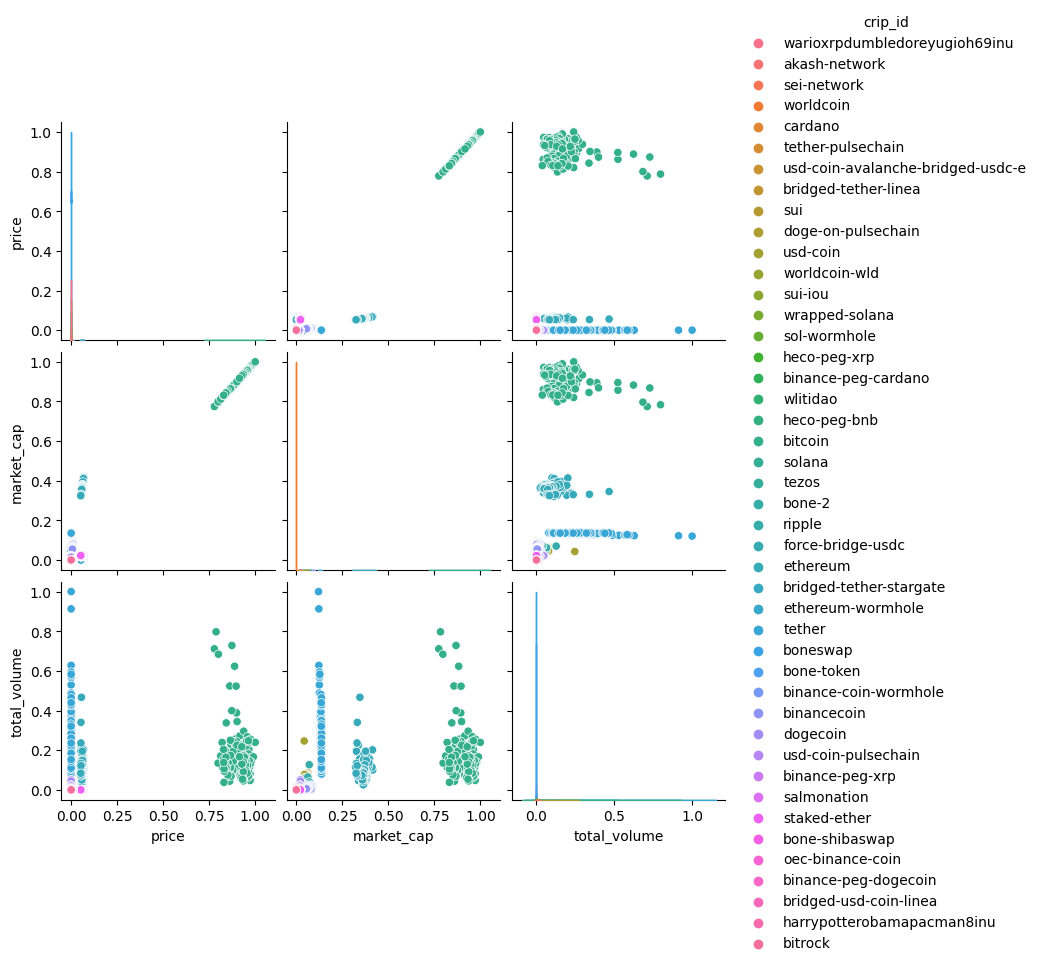

In [73]:
sns.pairplot(prices_normalized, hue = 'crip_id')

### 📈 OHLC of the currency
[
1594382400000 (time),
1.1 (open),
2.2 (high),
3.3 (low),
4.4 (close)
]

In [74]:
def get_coin_ohlc_list(crip_id):
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}/ohlc?vs_currency=usd&days=30&precision=5"
        
    response = requests.get(url)
        
    if response.status_code == 200:
        list_of_ohlc = response.json()
        df = pd.DataFrame(list_of_ohlc, columns=["timestamp", "open_price", "high_price", "low_price", "close_price"])
        df["crip_id"] = crip_id
        return df
    else:
        print(f"Error en la solicitud: Datos OHLC de {crip_id}", response.status_code)
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_ohlc_list(crip_id)

if __name__ == "__main__":
   
    list_of_ohlc_data = pd.DataFrame()

    for crip_id in lista_coins:
        ohlc_data = get_coin_ohlc_list(crip_id)
        if ohlc_data is not None:
            list_of_ohlc_data = pd.concat([list_of_ohlc_data, ohlc_data], ignore_index=True)



Error en la solicitud: Datos OHLC de sui 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud: Datos OHLC de bone-2 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud: Datos OHLC de staked-ether 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...


In [75]:
list_of_ohlc_data = list_of_ohlc_data.drop_duplicates()

In [76]:
list_of_ohlc_data.isnull().sum()

timestamp      0
open_price     0
high_price     0
low_price      0
close_price    0
crip_id        0
dtype: int64

In [77]:
# No convierto a float32 porque altera demasiado el numero, necesito precicion en esta parte de los datos
print(list_of_ohlc_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7088 entries, 0 to 7087
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    7088 non-null   int64  
 1   open_price   7088 non-null   float64
 2   high_price   7088 non-null   float64
 3   low_price    7088 non-null   float64
 4   close_price  7088 non-null   float64
 5   crip_id      7088 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 387.6+ KB
None


In [78]:
list_of_ohlc_data.head()

,timestamp,open_price,high_price,low_price,close_price,crip_id
0,1691064000000,0.00040,0.00040,0.00040,0.00040,warioxrpdumbledoreyugioh69inu
1,1691078400000,0.00038,0.00042,0.00033,0.00042,warioxrpdumbledoreyugioh69inu
2,1691092800000,0.00043,0.00044,0.00025,0.00031,warioxrpdumbledoreyugioh69inu
3,1691107200000,0.00028,0.00031,0.00028,0.00030,warioxrpdumbledoreyugioh69inu
4,1691121600000,0.00030,0.00030,0.00028,0.00030,warioxrpdumbledoreyugioh69inu


In [79]:
list_of_ohlc_data['timestamp'] = pd.to_datetime(list_of_ohlc_data['timestamp'], unit='ms')


In [80]:
unique_count = list_of_ohlc_data['crip_id'].nunique()
print(unique_count)


44


##### Guardo csv OHLC:

In [81]:
list_of_ohlc_data.to_csv('../Csvs_cleanned/ohlc_prices.csv', index=False, mode='w',header=True)

### 📃 tickers: Transacciones
Dionary:

last: latest unconverted price in the respective pair target currency

volume: unconverted 24h trading volume in the respective pair target currency

converted_last: latest converted price in BTC, ETH, and USD

converted_volume: converted 24h trading volume in BTC, ETH, and USD

Cache / Update Frequency: every 2 minutes

#### import data:

In [82]:


def get_coin_tickers(coin_id):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/tickers"
        
    response = requests.get(url)
        
    if response.status_code == 200:
        ticker_data = response.json()
        return ticker_data
    else:
        print(f"Error en la solicitud de tickers {crip_id}:", response.status_code)
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_tickers(coin_id)  # Reintentar la solicitud después de esperar
            
if __name__ == "__main__":
    tickers_resume = pd.DataFrame()

    for crip_id in lista_coins:
        ticker_data = get_coin_tickers(crip_id)
            
        if ticker_data is not None:
            tickers = ticker_data['tickers']
            
            for ticker in tickers:
                ticker['coin_id'] = crip_id
                
                # Crear un DataFrame a partir de los datos del ticker
                ticker_df = pd.DataFrame([ticker])
                tickers_resume = pd.concat([tickers_resume, ticker_df], ignore_index=True)

Error en la solicitud de tickers bridged-tether-linea: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud de tickers usd-coin: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud de tickers heco-peg-bnb: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud de tickers bone-2: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud de tickers bone-token: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud de tickers binance-peg-xrp: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud de tickers bitrock: 429
h

In [83]:
pd.set_option('display.max_colwidth', None)

#### simple and mini ETL

In [84]:
tickers_resume.head(10)

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,0XB1C064C3F2908F741C9DEA4AFC5773238B53E6CC,0XC02AAA39B223FE8D0A0E5C4F27EAD9083C756CC2,"{'name': 'Uniswap V2 (Ethereum)', 'identifier': 'uniswap_v2', 'has_trading_incentive': False}",4.365865e-08,2.279364e+07,"{'btc': 2.789e-09, 'eth': 4.3665e-08, 'usd': 7.279e-05}","{'btc': 0.06403451, 'eth': 1.002416, 'usd': 1670.91}",yellow,0.610212,2023-08-22T01:04:20+00:00,2023-08-22T01:04:20+00:00,2023-08-22T01:32:18+00:00,False,True,https://app.uniswap.org/#/swap?inputCurrency=0xb1c064c3f2908f741c9dea4afc5773238b53e6cc&outputCurrency=ETH,https://v2.info.uniswap.org/token/0xb1c064c3f2908f741c9dea4afc5773238b53e6cc,warioxrpdumbledoreyugioh69inu,weth
1,AKT,USDT,"{'name': 'KuCoin', 'identifier': 'kucoin', 'has_trading_incentive': False}",1.453200e+00,7.264280e+05,"{'btc': 5.573e-05, 'eth': 0.00088094, 'usd': 1.45}","{'btc': 40.482389, 'eth': 639.937, 'usd': 1054615}",green,0.309896,2023-08-24T17:24:55+00:00,2023-08-24T17:24:55+00:00,2023-08-24T17:24:55+00:00,False,False,https://www.kucoin.com/trade/AKT-USDT,None,akash-network,tether
2,AKT,USD,"{'name': 'Kraken', 'identifier': 'kraken', 'has_trading_incentive': False}",1.471800e+00,6.001172e+05,"{'btc': 5.646e-05, 'eth': 0.00089255, 'usd': 1.47}","{'btc': 33.884656, 'eth': 535.637, 'usd': 883253}",green,0.312542,2023-08-24T17:23:45+00:00,2023-08-24T17:23:45+00:00,2023-08-24T17:23:45+00:00,False,False,https://pro.kraken.com/app/trade/AKT-USD,None,akash-network,NaN
3,AKT,USDT,"{'name': 'AscendEX (BitMax)', 'identifier': 'bitmax', 'has_trading_incentive': False}",1.462120e+00,3.152540e+05,"{'btc': 5.607e-05, 'eth': 0.00088627, 'usd': 1.46}","{'btc': 17.676319, 'eth': 279.399, 'usd': 460772}",green,0.392221,2023-08-24T17:25:01+00:00,2023-08-24T17:25:01+00:00,2023-08-24T17:25:01+00:00,False,False,https://ascendex.com/en/cashtrade-spottrading/usdt/akt,None,akash-network,tether
4,AKT,USDT,"{'name': 'Gate.io', 'identifier': 'gate', 'has_trading_incentive': False}",1.455240e+00,2.198349e+05,"{'btc': 5.581e-05, 'eth': 0.0008821, 'usd': 1.45}","{'btc': 12.249217, 'eth': 193.616, 'usd': 319303}",green,0.3469,2023-08-24T17:25:53+00:00,2023-08-24T17:25:53+00:00,2023-08-24T17:25:53+00:00,False,False,https://gate.io/trade/AKT_USDT,None,akash-network,tether
5,AKT,USDT,"{'name': 'Huobi', 'identifier': 'huobi', 'has_trading_incentive': False}",1.450700e+00,7.148510e+05,"{'btc': 5.563e-05, 'eth': 0.00087934, 'usd': 1.45}","{'btc': 39.890601, 'eth': 630.526, 'usd': 1039835}",green,1.13722,2023-08-24T17:25:44+00:00,2023-08-24T17:25:44+00:00,2023-08-24T17:25:44+00:00,False,False,https://www.huobi.com/en-us/exchange/akt_usdt,None,akash-network,tether
6,AKT,ETH,"{'name': 'Gate.io', 'identifier': 'gate', 'has_trading_incentive': False}",8.810000e-04,4.549692e+03,"{'btc': 5.575e-05, 'eth': 0.0008812, 'usd': 1.45}","{'btc': 0.2532646, 'eth': 4.003198, 'usd': 6601.89}",green,1.576577,2023-08-24T17:25:53+00:00,2023-08-24T17:25:53+00:00,2023-08-24T17:25:53+00:00,False,False,https://gate.io/trade/AKT_ETH,None,akash-network,ethereum
7,AKT,EUR,"{'name': 'Kraken', 'identifier': 'kraken', 'has_trading_incentive': False}",1.351300e+00,3.211060e+04,"{'btc': 5.61e-05, 'eth': 0.00088685, 'usd': 1.46}","{'btc': 1.801484, 'eth': 28.477248, 'usd': 46958}",green,0.82359,2023-08-24T17:02:43+00:00,2023-08-24T17:02:43+00:00,2023-08-24T17:23:45+00:00,False,False,https://pro.kraken.com/app/trade/AKT-EUR,None,akash-network,NaN
8,AKT,USD,"{'name': 'Crypto.com Exchange', 'identifier': 'crypto_com', 'has_trading_incentive': False}",1.459300e+00,5.329300e+04,"{'btc': 5.598e-05, 'eth': 0.00088497, 'usd': 1.46}","{'btc': 2.983547, 'eth': 47.162904, 'usd': 77770}",green,1.69381,2023-08-24T17:20:12+00:00,2023-08-24T17:20:12+00:00,2023-08-24T17:23:30+00:00,False,False,https://crypto.com/exchange/trade/spot/AKT_USD,None,akash-network,NaN
9,AKT,

In [85]:
# Filtrar y mostrar las filas con valores nulos
rows_with_nulls = tickers_resume[tickers_resume.isnull().any(axis=1)]
rows_with_nulls.head(15)
print(rows_with_nulls.shape)

(1708, 18)


In [86]:
tickers_resume['token_info_url'] = tickers_resume['token_info_url'].fillna('not founded token_info_url #404')
tickers_resume['trade_url'] = tickers_resume['trade_url'].fillna('not founded trade_url #404')

In [87]:
tickers_resume['target_coin_id'] = tickers_resume['target_coin_id'].fillna('USD')

In [88]:
tickers_resume.shape

(1719, 18)

In [89]:
tickers_resume.isnull().sum()

base                           0
target                         0
market                         0
last                           0
volume                         0
converted_last                 0
converted_volume               0
trust_score                  140
bid_ask_spread_percentage    102
timestamp                      0
last_traded_at                 0
last_fetch_at                  0
is_anomaly                     0
is_stale                       0
trade_url                      0
token_info_url                 0
coin_id                        0
target_coin_id                 0
dtype: int64

#### Timestamp

In [90]:
# Convertir el formato de timestamp a timestamp numérico y agregar al DataFrame
tickers_resume['timestamp'] = tickers_resume['timestamp'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)
tickers_resume['last_traded_at'] = tickers_resume['last_traded_at'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)
tickers_resume['last_fetch_at'] = tickers_resume['last_fetch_at'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)

In [91]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,0XB1C064C3F2908F741C9DEA4AFC5773238B53E6CC,0XC02AAA39B223FE8D0A0E5C4F27EAD9083C756CC2,"{'name': 'Uniswap V2 (Ethereum)', 'identifier': 'uniswap_v2', 'has_trading_incentive': False}",4.365865e-08,2.279364e+07,"{'btc': 2.789e-09, 'eth': 4.3665e-08, 'usd': 7.279e-05}","{'btc': 0.06403451, 'eth': 1.002416, 'usd': 1670.91}",yellow,0.610212,1692666260000,1692666260000,1692667938000,False,True,https://app.uniswap.org/#/swap?inputCurrency=0xb1c064c3f2908f741c9dea4afc5773238b53e6cc&outputCurrency=ETH,https://v2.info.uniswap.org/token/0xb1c064c3f2908f741c9dea4afc5773238b53e6cc,warioxrpdumbledoreyugioh69inu,weth
1,AKT,USDT,"{'name': 'KuCoin', 'identifier': 'kucoin', 'has_trading_incentive': False}",1.453200e+00,7.264280e+05,"{'btc': 5.573e-05, 'eth': 0.00088094, 'usd': 1.45}","{'btc': 40.482389, 'eth': 639.937, 'usd': 1054615}",green,0.309896,1692897895000,1692897895000,1692897895000,False,False,https://www.kucoin.com/trade/AKT-USDT,not founded token_info_url #404,akash-network,tether
2,AKT,USD,"{'name': 'Kraken', 'identifier': 'kraken', 'has_trading_incentive': False}",1.471800e+00,6.001172e+05,"{'btc': 5.646e-05, 'eth': 0.00089255, 'usd': 1.47}","{'btc': 33.884656, 'eth': 535.637, 'usd': 883253}",green,0.312542,1692897825000,1692897825000,1692897825000,False,False,https://pro.kraken.com/app/trade/AKT-USD,not founded token_info_url #404,akash-network,USD
3,AKT,USDT,"{'name': 'AscendEX (BitMax)', 'identifier': 'bitmax', 'has_trading_incentive': False}",1.462120e+00,3.152540e+05,"{'btc': 5.607e-05, 'eth': 0.00088627, 'usd': 1.46}","{'btc': 17.676319, 'eth': 279.399, 'usd': 460772}",green,0.392221,1692897901000,1692897901000,1692897901000,False,False,https://ascendex.com/en/cashtrade-spottrading/usdt/akt,not founded token_info_url #404,akash-network,tether
4,AKT,USDT,"{'name': 'Gate.io', 'identifier': 'gate', 'has_trading_incentive': False}",1.455240e+00,2.198349e+05,"{'btc': 5.581e-05, 'eth': 0.0008821, 'usd': 1.45}","{'btc': 12.249217, 'eth': 193.616, 'usd': 319303}",green,0.3469,1692897953000,1692897953000,1692897953000,False,False,https://gate.io/trade/AKT_USDT,not founded token_info_url #404,akash-network,tether


#### market

In [92]:
tickers_resume['marketplace'] = tickers_resume['market'].apply(lambda x: x['name'])
tickers_resume['marketplace_id'] = tickers_resume['market'].apply(lambda x: x['identifier'])

In [93]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id,marketplace,marketplace_id
0,0XB1C064C3F2908F741C9DEA4AFC5773238B53E6CC,0XC02AAA39B223FE8D0A0E5C4F27EAD9083C756CC2,"{'name': 'Uniswap V2 (Ethereum)', 'identifier': 'uniswap_v2', 'has_trading_incentive': False}",4.365865e-08,2.279364e+07,"{'btc': 2.789e-09, 'eth': 4.3665e-08, 'usd': 7.279e-05}","{'btc': 0.06403451, 'eth': 1.002416, 'usd': 1670.91}",yellow,0.610212,1692666260000,1692666260000,1692667938000,False,True,https://app.uniswap.org/#/swap?inputCurrency=0xb1c064c3f2908f741c9dea4afc5773238b53e6cc&outputCurrency=ETH,https://v2.info.uniswap.org/token/0xb1c064c3f2908f741c9dea4afc5773238b53e6cc,warioxrpdumbledoreyugioh69inu,weth,Uniswap V2 (Ethereum),uniswap_v2
1,AKT,USDT,"{'name': 'KuCoin', 'identifier': 'kucoin', 'has_trading_incentive': False}",1.453200e+00,7.264280e+05,"{'btc': 5.573e-05, 'eth': 0.00088094, 'usd': 1.45}","{'btc': 40.482389, 'eth': 639.937, 'usd': 1054615}",green,0.309896,1692897895000,1692897895000,1692897895000,False,False,https://www.kucoin.com/trade/AKT-USDT,not founded token_info_url #404,akash-network,tether,KuCoin,kucoin
2,AKT,USD,"{'name': 'Kraken', 'identifier': 'kraken', 'has_trading_incentive': False}",1.471800e+00,6.001172e+05,"{'btc': 5.646e-05, 'eth': 0.00089255, 'usd': 1.47}","{'btc': 33.884656, 'eth': 535.637, 'usd': 883253}",green,0.312542,1692897825000,1692897825000,1692897825000,False,False,https://pro.kraken.com/app/trade/AKT-USD,not founded token_info_url #404,akash-network,USD,Kraken,kraken
3,AKT,USDT,"{'name': 'AscendEX (BitMax)', 'identifier': 'bitmax', 'has_trading_incentive': False}",1.462120e+00,3.152540e+05,"{'btc': 5.607e-05, 'eth': 0.00088627, 'usd': 1.46}","{'btc': 17.676319, 'eth': 279.399, 'usd': 460772}",green,0.392221,1692897901000,1692897901000,1692897901000,False,False,https://ascendex.com/en/cashtrade-spottrading/usdt/akt,not founded token_info_url #404,akash-network,tether,AscendEX (BitMax),bitmax
4,AKT,USDT,"{'name': 'Gate.io', 'identifier': 'gate', 'has_trading_incentive': False}",1.455240e+00,2.198349e+05,"{'btc': 5.581e-05, 'eth': 0.0008821, 'usd': 1.45}","{'btc': 12.249217, 'eth': 193.616, 'usd': 319303}",green,0.3469,1692897953000,1692897953000,1692897953000,False,False,https://gate.io/trade/AKT_USDT,not founded token_info_url #404,akash-network,tether,Gate.io,gate


#### converted_last


In [94]:
tickers_resume['converted_last_btc'] = tickers_resume['converted_last'].apply(lambda x: x['btc'])
tickers_resume['converted_last_eth'] = tickers_resume['converted_last'].apply(lambda x: x['eth'])
tickers_resume['converted_last_usd'] = tickers_resume['converted_last'].apply(lambda x: x['usd'])

In [95]:
tickers_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       1719 non-null   object 
 1   target                     1719 non-null   object 
 2   market                     1719 non-null   object 
 3   last                       1719 non-null   float64
 4   volume                     1719 non-null   float64
 5   converted_last             1719 non-null   object 
 6   converted_volume           1719 non-null   object 
 7   trust_score                1579 non-null   object 
 8   bid_ask_spread_percentage  1617 non-null   object 
 9   timestamp                  1719 non-null   int64  
 10  last_traded_at             1719 non-null   int64  
 11  last_fetch_at              1719 non-null   int64  
 12  is_anomaly                 1719 non-null   bool   
 13  is_stale                   1719 non-null   bool 

In [96]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,...,is_stale,trade_url,token_info_url,coin_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd
0,0XB1C064C3F2908F741C9DEA4AFC5773238B53E6CC,0XC02AAA39B223FE8D0A0E5C4F27EAD9083C756CC2,"{'name': 'Uniswap V2 (Ethereum)', 'identifier': 'uniswap_v2', 'has_trading_incentive': False}",4.365865e-08,2.279364e+07,"{'btc': 2.789e-09, 'eth': 4.3665e-08, 'usd': 7.279e-05}","{'btc': 0.06403451, 'eth': 1.002416, 'usd': 1670.91}",yellow,0.610212,1692666260000,...,True,https://app.uniswap.org/#/swap?inputCurrency=0xb1c064c3f2908f741c9dea4afc5773238b53e6cc&outputCurrency=ETH,https://v2.info.uniswap.org/token/0xb1c064c3f2908f741c9dea4afc5773238b53e6cc,warioxrpdumbledoreyugioh69inu,weth,Uniswap V2 (Ethereum),uniswap_v2,2.789000e-09,4.366500e-08,0.000073
1,AKT,USDT,"{'name': 'KuCoin', 'identifier': 'kucoin', 'has_trading_incentive': False}",1.453200e+00,7.264280e+05,"{'btc': 5.573e-05, 'eth': 0.00088094, 'usd': 1.45}","{'btc': 40.482389, 'eth': 639.937, 'usd': 1054615}",green,0.309896,1692897895000,...,False,https://www.kucoin.com/trade/AKT-USDT,not founded token_info_url #404,akash-network,tether,KuCoin,kucoin,5.573000e-05,8.809400e-04,1.450000
2,AKT,USD,"{'name': 'Kraken', 'identifier': 'kraken', 'has_trading_incentive': False}",1.471800e+00,6.001172e+05,"{'btc': 5.646e-05, 'eth': 0.00089255, 'usd': 1.47}","{'btc': 33.884656, 'eth': 535.637, 'usd': 883253}",green,0.312542,1692897825000,...,False,https://pro.kraken.com/app/trade/AKT-USD,not founded token_info_url #404,akash-network,USD,Kraken,kraken,5.646000e-05,8.925500e-04,1.470000
3,AKT,USDT,"{'name': 'AscendEX (BitMax)', 'identifier': 'bitmax', 'has_trading_incentive': False}",1.462120e+00,3.152540e+05,"{'btc': 5.607e-05, 'eth': 0.00088627, 'usd': 1.46}","{'btc': 17.676319, 'eth': 279.399, 'usd': 460772}",green,0.392221,1692897901000,...,False,https://ascendex.com/en/cashtrade-spottrading/usdt/akt,not founded token_info_url #404,akash-network,tether,AscendEX (BitMax),bitmax,5.607000e-05,8.862700e-04,1.460000
4,AKT,USDT,"{'name': 'Gate.io', 'identifier': 'gate', 'has_trading_incentive': False}",1.455240e+00,2.198349e+05,"{'btc': 5.581e-05, 'eth': 0.0008821, 'usd': 1.45}","{'btc': 12.249217, 'eth': 193.616, 'usd': 319303}",green,0.3469,1692897953000,...,False,https://gate.io/trade/AKT_USDT,not founded token_info_url #404,akash-network,tether,Gate.io,gate,5.581000e-05,8.821000e-04,1.450000


#### converted_volume


In [97]:
tickers_resume['converted_volume_btc'] = tickers_resume['converted_volume'].apply(lambda x: x['btc'])
tickers_resume['converted_volume_eth'] = tickers_resume['converted_volume'].apply(lambda x: x['eth'])
tickers_resume['converted_volume_usd'] = tickers_resume['converted_volume'].apply(lambda x: x['usd'])

In [98]:
tickers_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       1719 non-null   object 
 1   target                     1719 non-null   object 
 2   market                     1719 non-null   object 
 3   last                       1719 non-null   float64
 4   volume                     1719 non-null   float64
 5   converted_last             1719 non-null   object 
 6   converted_volume           1719 non-null   object 
 7   trust_score                1579 non-null   object 
 8   bid_ask_spread_percentage  1617 non-null   object 
 9   timestamp                  1719 non-null   int64  
 10  last_traded_at             1719 non-null   int64  
 11  last_fetch_at              1719 non-null   int64  
 12  is_anomaly                 1719 non-null   bool   
 13  is_stale                   1719 non-null   bool 

In [99]:
column_drop = ['market','converted_last','converted_volume']
# Eliminar las columnas del DataFrame
tickers_resume = tickers_resume.drop(columns=column_drop)

In [100]:
tickers_resume = tickers_resume.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [101]:
tickers_resume.head()

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,...,coin_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,0xb1c064c3f2908f741c9dea4afc5773238b53e6cc,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,4.365865e-08,2.279364e+07,yellow,0.610212,1692666260000,1692666260000,1692667938000,False,...,warioxrpdumbledoreyugioh69inu,weth,uniswap v2 (ethereum),uniswap_v2,2.789000e-09,4.366500e-08,0.000073,0.064035,1.002416,1670.91
1,akt,usdt,1.453200e+00,7.264280e+05,green,0.309896,1692897895000,1692897895000,1692897895000,False,...,akash-network,tether,kucoin,kucoin,5.573000e-05,8.809400e-04,1.450000,40.482389,639.937000,1054615.00
2,akt,usd,1.471800e+00,6.001172e+05,green,0.312542,1692897825000,1692897825000,1692897825000,False,...,akash-network,usd,kraken,kraken,5.646000e-05,8.925500e-04,1.470000,33.884656,535.637000,883253.00
3,akt,usdt,1.462120e+00,3.152540e+05,green,0.392221,1692897901000,1692897901000,1692897901000,False,...,akash-network,tether,ascendex (bitmax),bitmax,5.607000e-05,8.862700e-04,1.460000,17.676319,279.399000,460772.00
4,akt,usdt,1.455240e+00,2.198349e+05,green,0.346900,1692897953000,1692897953000,1692897953000,False,...,akash-network,tether,gate.io,gate,5.581000e-05,8.821000e-04,1.450000,12.249217,193.616000,319303.00


In [102]:
tickers_resume['timestamp'] = pd.to_datetime(tickers_resume['timestamp'], unit='ms')
tickers_resume['last_traded_at'] = pd.to_datetime(tickers_resume['last_traded_at'], unit='ms')
tickers_resume['last_fetch_at'] = pd.to_datetime(tickers_resume['last_fetch_at'], unit='ms')

In [103]:
# Renombrar la columna
tickers_resume.rename(columns={'coin_id': 'crip_id'}, inplace=True)

##### Guardo ticker.csv:

In [104]:
tickers_resume.to_csv('../Csvs_cleanned/tickers_resume.csv', index=False, mode='w',header=True)

In [105]:
tickers_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   base                       1719 non-null   object        
 1   target                     1719 non-null   object        
 2   last                       1719 non-null   float64       
 3   volume                     1719 non-null   float64       
 4   trust_score                1579 non-null   object        
 5   bid_ask_spread_percentage  1617 non-null   float64       
 6   timestamp                  1719 non-null   datetime64[ns]
 7   last_traded_at             1719 non-null   datetime64[ns]
 8   last_fetch_at              1719 non-null   datetime64[ns]
 9   is_anomaly                 1719 non-null   bool          
 10  is_stale                   1719 non-null   bool          
 11  trade_url                  1719 non-null   object        
 12  token_

#### ticker_df numeric cols correlation matrix

In [106]:

# Seleccionar solo las columnas numéricas
numeric_columns = tickers_resume.select_dtypes(include=['float32', 'float64', 'int32', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

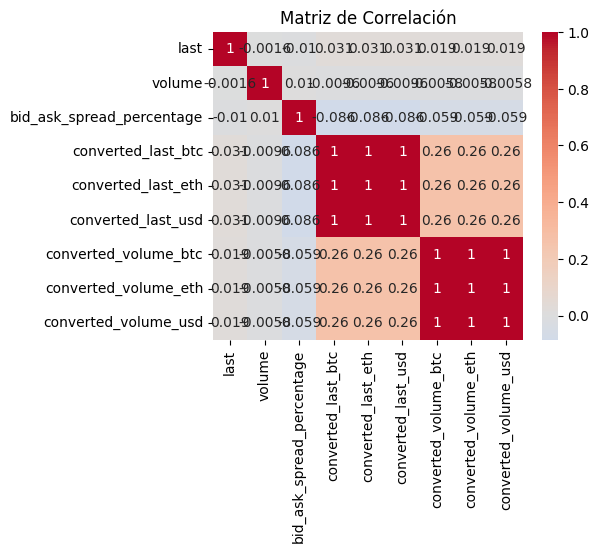

In [107]:
# Crear un heatmap utilizando seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()

#### Producto ticker_df:

In [108]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [109]:
tickers_resume.head(10)

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,crip_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,0xb1c064c3f2908f741c9dea4afc5773238b53e6cc,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,4.365865e-08,2.279364e+07,yellow,0.610212,2023-08-22 01:04:20,2023-08-22 01:04:20,2023-08-22 01:32:18,False,True,https://app.uniswap.org/#/swap?inputcurrency=0xb1c064c3f2908f741c9dea4afc5773238b53e6cc&outputcurrency=eth,https://v2.info.uniswap.org/token/0xb1c064c3f2908f741c9dea4afc5773238b53e6cc,warioxrpdumbledoreyugioh69inu,weth,uniswap v2 (ethereum),uniswap_v2,2.789000e-09,4.366500e-08,0.000073,0.064035,1.002416,1670.91
1,akt,usdt,1.453200e+00,7.264280e+05,green,0.309896,2023-08-24 17:24:55,2023-08-24 17:24:55,2023-08-24 17:24:55,False,False,https://www.kucoin.com/trade/akt-usdt,not founded token_info_url #404,akash-network,tether,kucoin,kucoin,5.573000e-05,8.809400e-04,1.450000,40.482389,639.937000,1054615.00
2,akt,usd,1.471800e+00,6.001172e+05,green,0.312542,2023-08-24 17:23:45,2023-08-24 17:23:45,2023-08-24 17:23:45,False,False,https://pro.kraken.com/app/trade/akt-usd,not founded token_info_url #404,akash-network,usd,kraken,kraken,5.646000e-05,8.925500e-04,1.470000,33.884656,535.637000,883253.00
3,akt,usdt,1.462120e+00,3.152540e+05,green,0.392221,2023-08-24 17:25:01,2023-08-24 17:25:01,2023-08-24 17:25:01,False,False,https://ascendex.com/en/cashtrade-spottrading/usdt/akt,not founded token_info_url #404,akash-network,tether,ascendex (bitmax),bitmax,5.607000e-05,8.862700e-04,1.460000,17.676319,279.399000,460772.00
4,akt,usdt,1.455240e+00,2.198349e+05,green,0.346900,2023-08-24 17:25:53,2023-08-24 17:25:53,2023-08-24 17:25:53,False,False,https://gate.io/trade/akt_usdt,not founded token_info_url #404,akash-network,tether,gate.io,gate,5.581000e-05,8.821000e-04,1.450000,12.249217,193.616000,319303.00
5,akt,usdt,1.450700e+00,7.148510e+05,green,1.137220,2023-08-24 17:25:44,2023-08-24 17:25:44,2023-08-24 17:25:44,False,False,https://www.huobi.com/en-us/exchange/akt_usdt,not founded token_info_url #404,akash-network,tether,huobi,huobi,5.563000e-05,8.793400e-04,1.450000,39.890601,630.526000,1039835.00
6,akt,eth,8.810000e-04,4.549692e+03,green,1.576577,2023-08-24 17:25:53,2023-08-24 17:25:53,2023-08-24 17:25:53,False,False,https://gate.io/trade/akt_eth,not founded token_info_url #404,akash-network,ethereum,gate.io,gate,5.575000e-05,8.812000e-04,1.450000,0.253265,4.003198,6601.89
7,akt,eur,1.351300e+00,3.211060e+04,green,0.823590,2023-08-24 17:02:43,2023-08-24 17:02:43,2023-08-24 17:23:45,False,False,https://pro.kraken.com/app/trade/akt-eur,not founded token_info_url #404,akash-network,usd,kraken,kraken,5.610000e-05,8.868500e-04,1.460000,1.801484,28.477248,46958.00
8,akt,usd,1.459300e+00,5.329300e+04,green,1.693810,2023-08-24 17:20:12,2023-08-24 17:20:12,2023-08-24 17:23:30,False,False,https://crypto.com/exchange/trade/spot/akt_usd,not founded token_info_url #404,akash-network,usd,crypto.com exchange,crypto_com,5.598000e-05,8.849700e-04,1.460000,2.983547,47.162904,77770.00
9,akt,usdt,1.463300e+00,8.562287e+03,green,0.996723,2023-08-24 17:24:00,2023-08-24 17:24:00,2023-08-24 17:24:00,False,False,https://www.coinex.com/trading?currency=usdt&dest=akt#limit,not founded token_info_url #404,akash-network,tether,coinex,coinex,5.612000e-05,8.870600e-04,1.460000,0.476636,7.534554,12416.93


### normalized ticker_df for ML then

In [110]:
# Seleccionar solo las columnas numéricas
numeric_columns = tickers_resume.select_dtypes(include=['float32', 'float64', 'int32', 'int64'])

In [111]:
numeric_columns.head()

,last,volume,bid_ask_spread_percentage,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,4.365865e-08,2.279364e+07,0.610212,2.789000e-09,4.366500e-08,0.000073,0.064035,1.002416,1670.91
1,1.453200e+00,7.264280e+05,0.309896,5.573000e-05,8.809400e-04,1.450000,40.482389,639.937000,1054615.00
2,1.471800e+00,6.001172e+05,0.312542,5.646000e-05,8.925500e-04,1.470000,33.884656,535.637000,883253.00
3,1.462120e+00,3.152540e+05,0.392221,5.607000e-05,8.862700e-04,1.460000,17.676319,279.399000,460772.00
4,1.455240e+00,2.198349e+05,0.346900,5.581000e-05,8.821000e-04,1.450000,12.249217,193.616000,319303.00


In [112]:
# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización Min-Max al DataFrame
normalized_numeric_columns = scaler.fit_transform(numeric_columns)

# Crear un nuevo DataFrame normalizado
normalized_df = pd.DataFrame(normalized_numeric_columns, columns=numeric_columns.columns)

In [113]:
normalized_df.head()

,last,volume,bid_ask_spread_percentage,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,1.307399e-14,1.964385e-08,0.014629,2.785438e-09,2.759430e-09,2.764976e-09,0.000001,0.000001,0.000001
1,4.351742e-07,6.260449e-10,0.007310,5.566248e-05,5.567509e-05,5.508281e-05,0.000673,0.000674,0.000674
2,4.407442e-07,5.171887e-10,0.007374,5.639160e-05,5.640884e-05,5.584258e-05,0.000564,0.000564,0.000564
3,4.378454e-07,2.716899e-10,0.009316,5.600207e-05,5.601195e-05,5.546270e-05,0.000294,0.000294,0.000294
4,4.357851e-07,1.894565e-10,0.008211,5.574238e-05,5.574841e-05,5.508281e-05,0.000204,0.000204,0.000204


##### Guardo normalized_tickers_resume.csv

In [114]:
normalized_df.to_csv('../Csvs_cleanned/normalized_tickers_resume.csv', index=False, mode='w',header=True)

### 🌎📊 Global Eecentralized Finance(defi) data: # Aún no utiliazda...
Code	Description
defi_market_cap	
Defi Market Capitalization in USD

eth_market_cap	
Ethereum Market Capitalization in USD

defi_to_eth_ratio	
defi_market_cap to eth_market_cap ratio

trading_volume_24h	
defi trading volume in 24h in USD

defi_dominance	
defi_market_cap to total_market_cap ratio

top_coin_name	
defi coin with largest market_cap

top_coin_dominance	
top defi coin market dominance

In [115]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/global/decentralized_finance_defi"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_ecentralized_data = response.json()
        list_of_global_ecentralized_data = pd.DataFrame(global_ecentralized_data)
        return list_of_global_ecentralized_data
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_global_ecentralized_data = get_coin_list()
    if list_of_global_ecentralized_data is not None:
        print(list_of_global_ecentralized_data)


                                                                                     data
defi_dominance            3.8016281484124596813472935006897202338863330980972641131971176
defi_market_cap                                           41538214489.5351153585068126257
defi_to_eth_ratio        20.9507841566051878312664170886245440319673928887493117726630758
eth_market_cap                                           198265679122.2742603051668208014
top_coin_defi_dominance                                                         33.192478
top_coin_name                                                           Lido Staked Ether
trading_volume_24h                                       1382833991.589977999365098983601


### notas: En un futuro me gustaria agregar webscraping, para lectura de diarions, novedades paginas con valor agregado en informacion sobre los mercados, no solo de criptomonedas si no tambien del mundo global, acciones de empresas, bonos estatales, por ejemplo..

_________________________________________